In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from scipy.io import loadmat
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
WA = r"$\textrm{W}_\mathcal{G}(\hat{\textbf{p}}_{\mathcal{H}(\mathcal{T})}, \textbf{p}^\star_{\mathcal{H}(\mathcal{T})})$"
TV = r"$\textrm{TV}(\hat{\textbf{p}}_{\mathcal{H}(\mathcal{T})}, \textbf{p}^\star_{\mathcal{H}(\mathcal{T})})$"
label_size = 22
tick_size = 20
title_size = 24
legend_size = 18

In [2]:
label_mapping = {"noiseless": "Noiseless", 
                 "bernoulli01": "Bern(0.01)", 
                 "sigmoid500": "Sigmoid", 
                 "least-square-l2": "Least Square + L2",
                 "least-square-l1": "Least Square + L1",
                 "least-square-graph": "Least Square + Graph",
                 "lu": "Lu and Boutilier ($K=2$)",
                 'lu2': "Lu and Boutilier ($K=2$)",
                 'lu3': "Lu and Boutilier ($K=3$)",
                 'lu4': "Lu and Boutilier ($K=4$)",
                 'lu5': "Lu and Boutilier ($K=5$)",
                 'lu6': "Lu and Boutilier ($K=6$)",
                 "least-square-1": "Least Square",
                 "least-square": "Least Square",
                 "kl": "KL",}

In [3]:
df_n_h = pd.read_parquet("varying_n_h_p1.parquet")
df_n_p = pd.read_parquet("varying_n_p_p1.parquet")

In [4]:
df_n_p = df_n_p[((df_n_p.noise == "noiseless") | (df_n_p.noise == "bernoulli01") | (df_n_p.noise == "sigmoid500")) & (df_n_p.user_dist == "mix3gaussian") & (df_n_p.method  == "least-square-graph")] 
df_n_h = df_n_h[((df_n_h.noise == "noiseless") | (df_n_h.noise == "bernoulli01") | (df_n_h.noise == "sigmoid500")) & (df_n_h.user_dist == "mix3gaussian")  & (df_n_h.method  == "least-square-graph")]

In [5]:
df_n_p = df_n_p.sort_values(by="noise", key=lambda x: list(map(lambda y: {"noiseless": 0, "bernoulli01": 1, "sigmoid500": 2}[y], x)))
df_n_h = df_n_h.sort_values(by="noise", key=lambda x: list(map(lambda y: {"noiseless": 0, "bernoulli01": 1, "sigmoid500": 2}[y], x)))

/var/folders/0b/gtjn2bqj7hl7mth2hd2ybr700000gn/T/ipykernel_2009/154871823.py:26: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axs[1].set_ylim([0, 1])
/var/folders/0b/gtjn2bqj7hl7mth2hd2ybr700000gn/T/ipykernel_2009/154871823.py:44: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


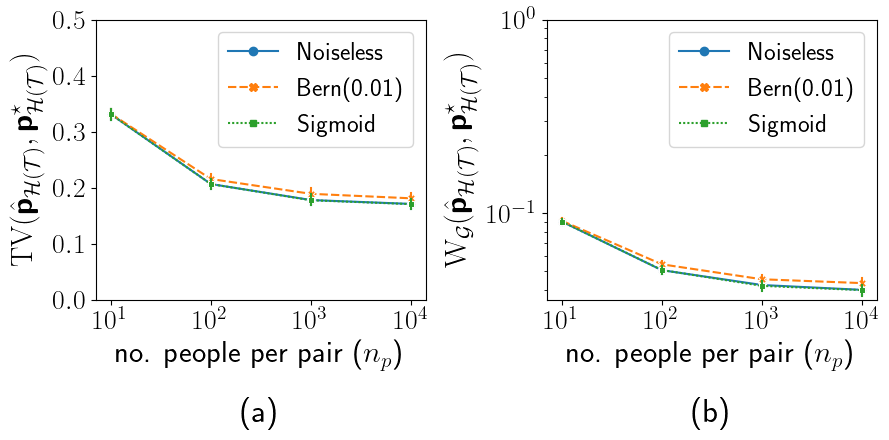

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4.5))

sns.lineplot(data=df_n_p,
             x="n_p",
             y="tv_err_q_hat",
             err_style="bars",
             markers=True,
             hue="noise",
             style="noise",
             ax=axs[0])
axs[0].set_ylim([0, 0.5])
axs[0].set_xscale("log")
axs[0].set_xticks([10, 100, 1000, 10000])
axs[0].set_ylabel(TV, fontsize=label_size)
axs[0].set_xlabel(r"no. people per pair ($n_p$)", fontsize=label_size)

sns.lineplot(data=df_n_p,
             x="n_p",
             y="wa_err_q_hat",
             err_style="bars",
             markers=True,
             hue="noise",
             style="noise",
             ax=axs[1])
axs[1].set_yscale('log')
axs[1].set_ylim([0, 1])
axs[1].set_xscale("log")
axs[1].set_xticks([10, 100, 1000, 10000])
axs[1].set_ylabel(WA, fontsize=label_size)
axs[1].set_xlabel(r"no. people per pair ($n_p$)", fontsize=label_size)

handles, labels = axs[0].get_legend_handles_labels()
new_labels = list(map(lambda x: label_mapping[x], labels))
axs[0].legend(handles, new_labels, fontsize=legend_size)
axs[1].legend(handles, new_labels, fontsize=legend_size)

for i, ax in enumerate(axs):
    ax.tick_params(axis='both', which='major', labelsize=tick_size)
    ax.set_title("(" + f"{chr(97 + i)}" + ")", loc="center", y=0, fontsize=title_size, pad=-70, verticalalignment="top")

# fig.legend(handles, new_labels, loc="outside lower center", bbox_to_anchor=(0.29, -0.12), fancybox=False, shadow=False, ncol=3, fontsize=legend_size)
fig.tight_layout()
fig.savefig(f"fig/2d_aistats_simulation.pdf", dpi=300, format="pdf", bbox_inches="tight")
fig.show()

/var/folders/0b/gtjn2bqj7hl7mth2hd2ybr700000gn/T/ipykernel_2009/639307315.py:30: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim([0, 1])
/var/folders/0b/gtjn2bqj7hl7mth2hd2ybr700000gn/T/ipykernel_2009/639307315.py:51: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


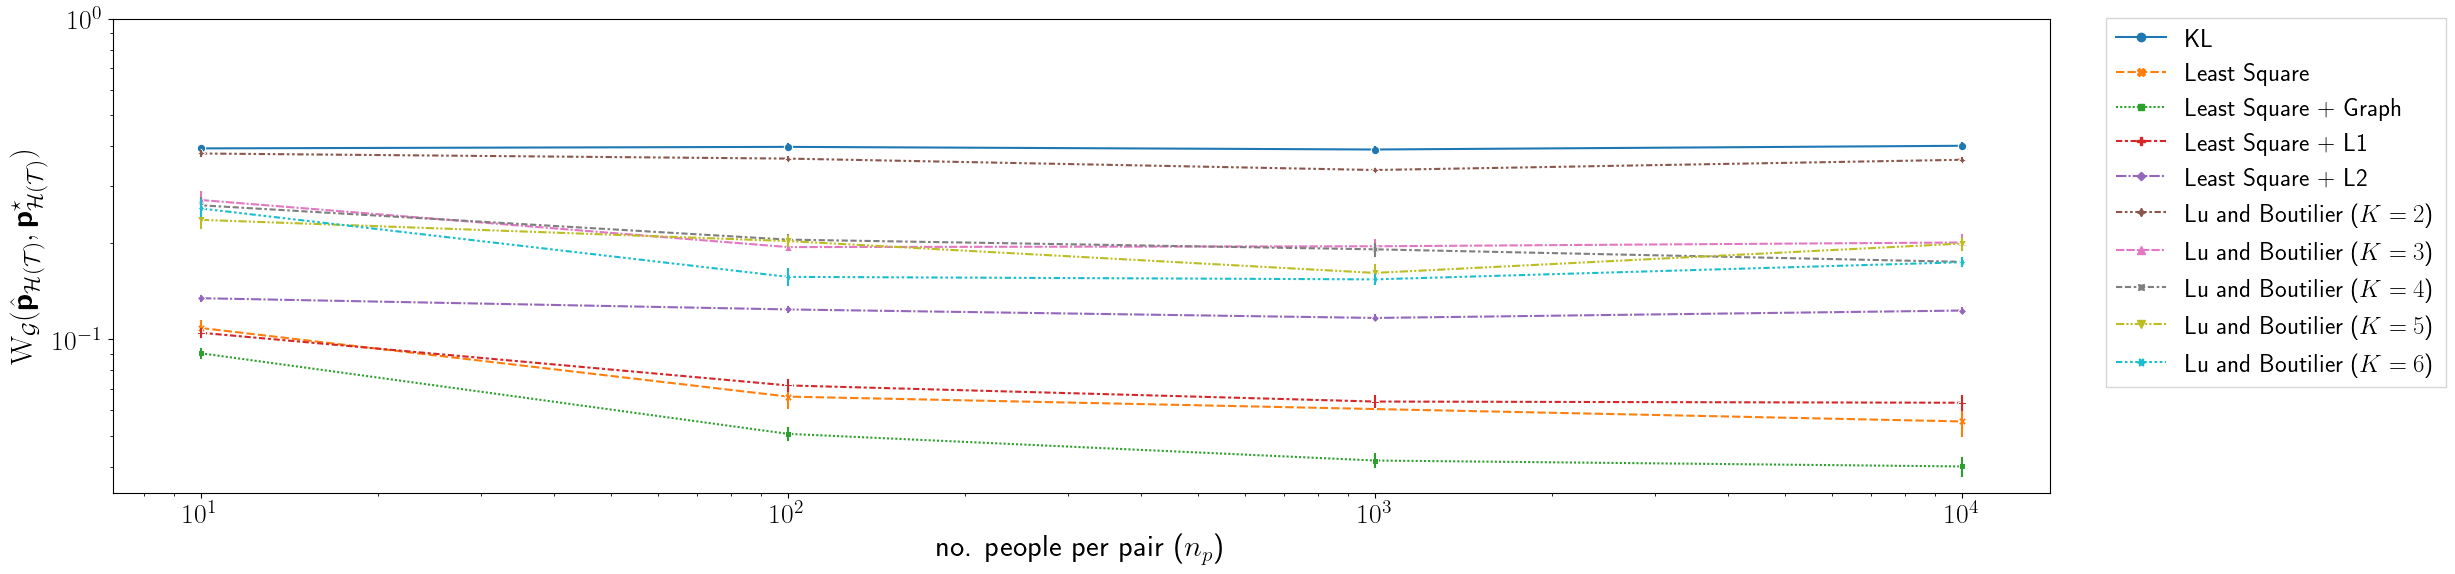

In [7]:
handles, labels = None, None

df_n_p = pd.read_parquet("varying_n_p_p1.parquet")
df_n_p = df_n_p[(df_n_p.noise == "noiseless") &
                (df_n_p.user_dist == "mix3gaussian")]
df_appendix = pd.read_parquet("2d_varying_n_p_results_appendix.parquet")
df_appendix = df_appendix[(df_appendix.noise == "noiseless") &
                          (df_appendix.user_dist == "mix3gaussian") & 
                          (df_appendix.method == "lu") &
                          (df_appendix.K > 2)]
df_appendix.method = df_appendix.method + df_appendix.K.astype(str)

df_extra = pd.read_parquet("2d_varying_n_p_results.parquet")
df_n_p = pd.concat([df_n_p, df_extra, pd.read_parquet("2d_varying_n_p_results_part_1.parquet"), df_appendix], axis=0)[['n_p', 'wa_err_q_hat', 'method']]
df_n_p.index = np.arange(len(df_n_p))
df_n_p.sort_values(by="method", inplace=True)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20.7, 5.85))


sns.lineplot(data=df_n_p,
             x="n_p",
             y="wa_err_q_hat",
             err_style="bars",
             markers=True,
             hue="method",
             style="method",
             ax=ax)
ax.set_yscale('log')
ax.set_ylim([0, 1])
ax.set_xscale("log")
ax.set_xticks([10, 100, 1000, 10000])
ax.set_ylabel(WA, fontsize=label_size)
ax.set_xlabel(r"no. people per pair ($n_p$)", fontsize=label_size)
ax.legend().remove()

if handles is None and labels is None:
    handles, labels = ax.get_legend_handles_labels()
    new_labels = list(map(lambda x: label_mapping[x], labels))
    idx = np.argsort(new_labels)
    handles, labels = np.array(handles)[idx], np.array(new_labels)[idx]


ax.tick_params(axis='both', which='major', labelsize=tick_size)

fig.legend(handles, labels, loc="upper right", bbox_to_anchor=(1.19, 0.98), fancybox=False, shadow=False, ncol=1, fontsize=legend_size)

fig.tight_layout()
fig.savefig("fig/2d_aistats_baselines.pdf", dpi=300, format="pdf", bbox_inches="tight")
fig.savefig("fig/2d_aistats_baselines_mix3gaussian.pdf", dpi=300, format="pdf", bbox_inches="tight")
fig.show()

/var/folders/0b/gtjn2bqj7hl7mth2hd2ybr700000gn/T/ipykernel_2009/3488108694.py:29: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim([0, 1])
/var/folders/0b/gtjn2bqj7hl7mth2hd2ybr700000gn/T/ipykernel_2009/3488108694.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/0b/gtjn2bqj7hl7mth2hd2ybr700000gn/T/ipykernel_2009/3488108694.py:29: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim([0, 1])
/var/folders/0b/gtjn2bqj7hl7mth2hd2ybr700000gn/T/ipykernel_2009/3488108694.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/0b/gtjn2bqj7hl7mth2hd2ybr700000gn/T/ipykernel_2009/3488108694.py:29: UserWarning: Attempt to set non-positive ylim on a log-scaled axis wil

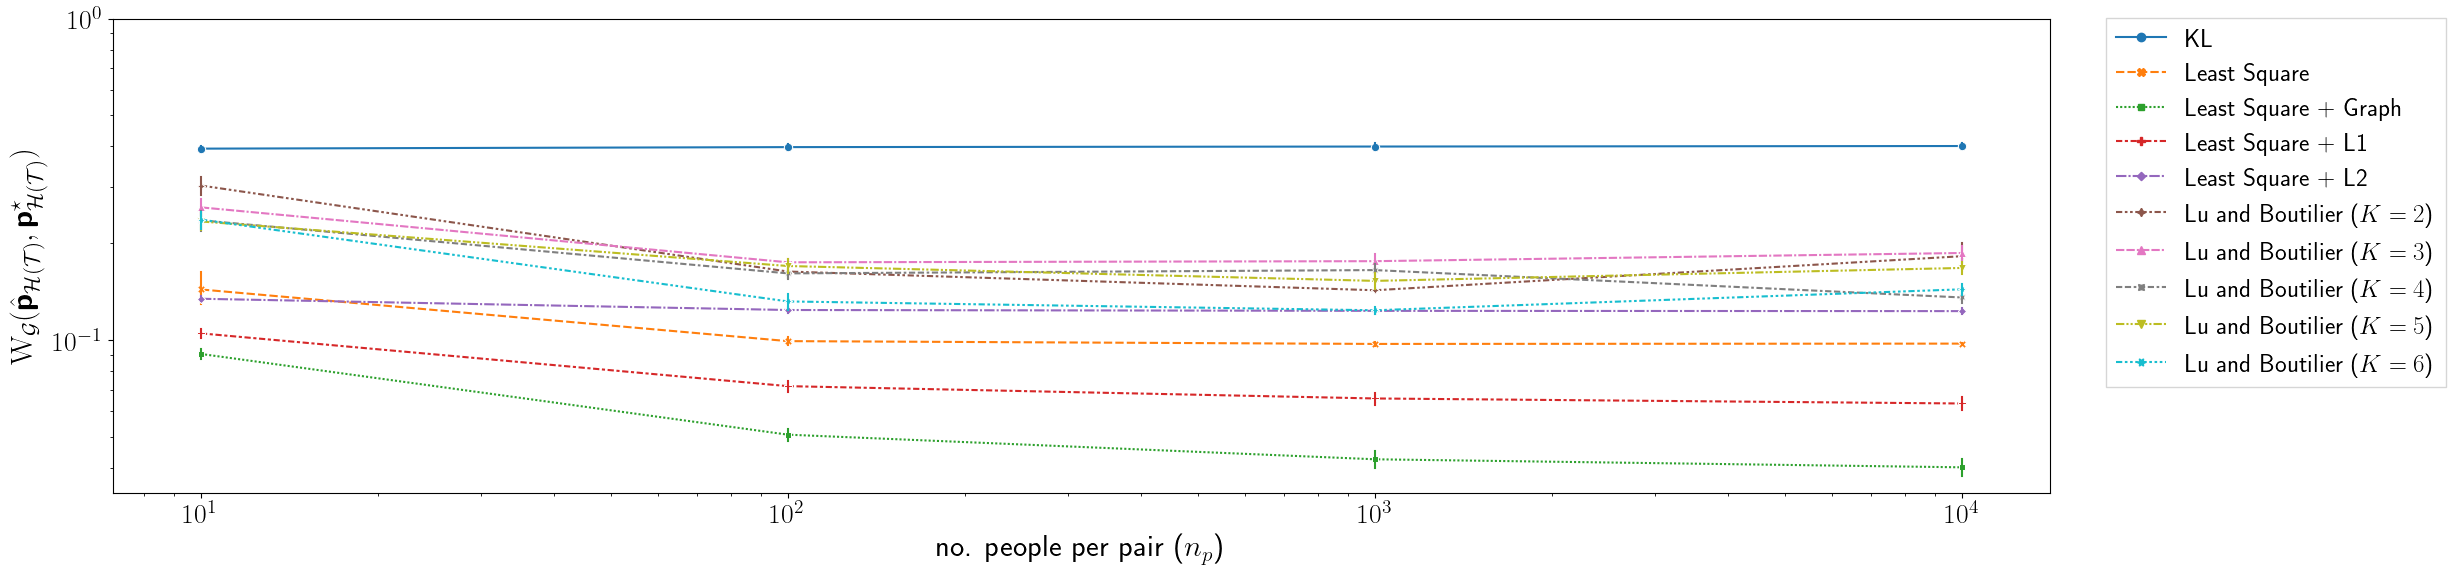

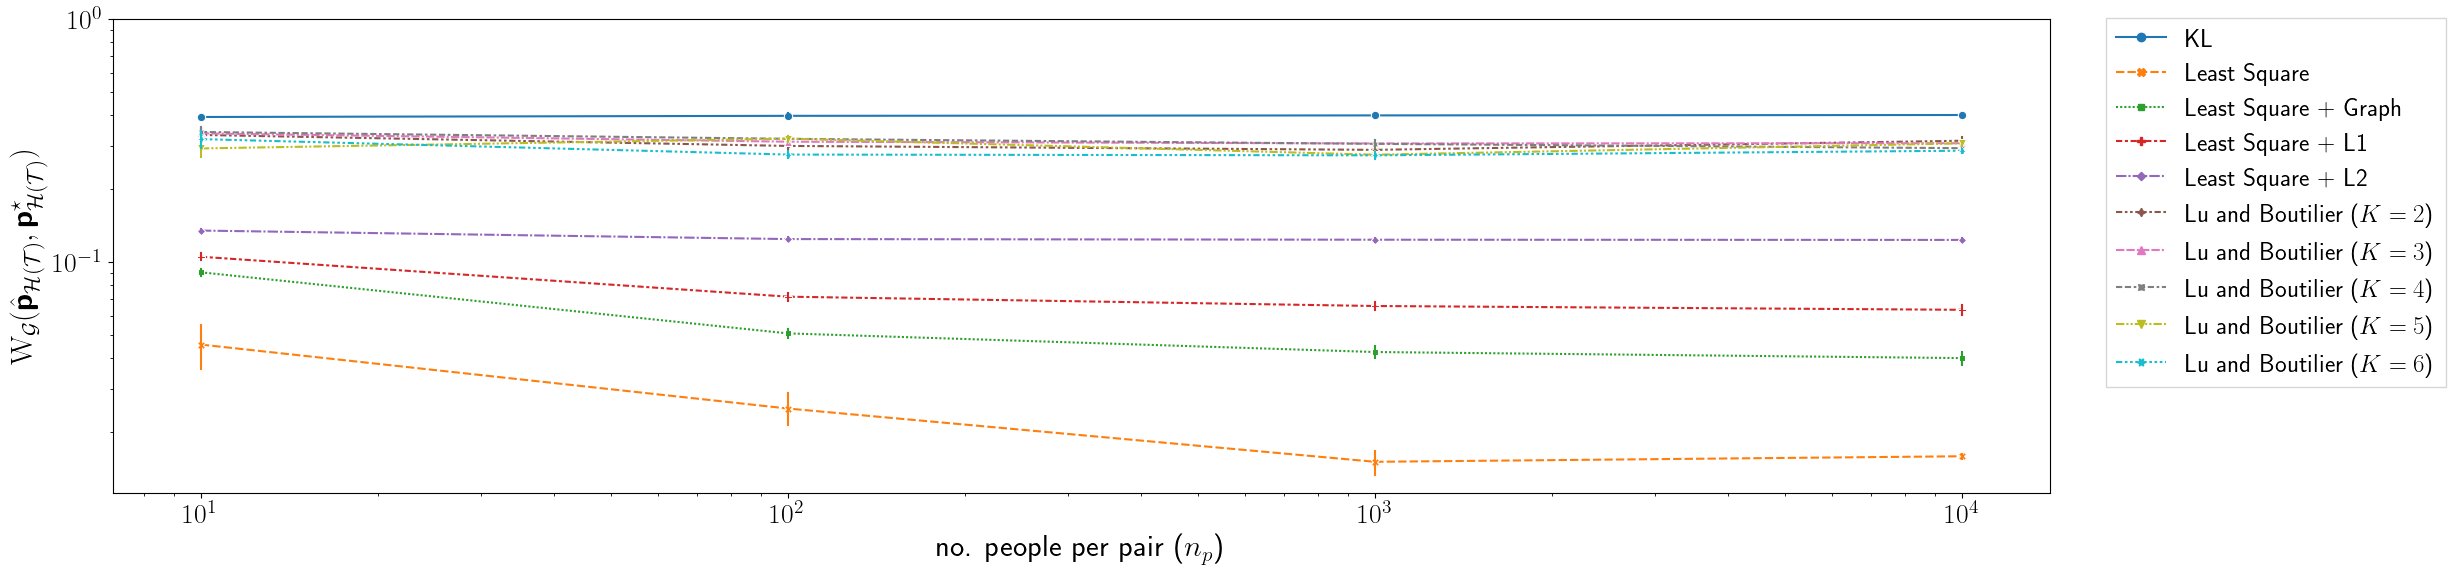

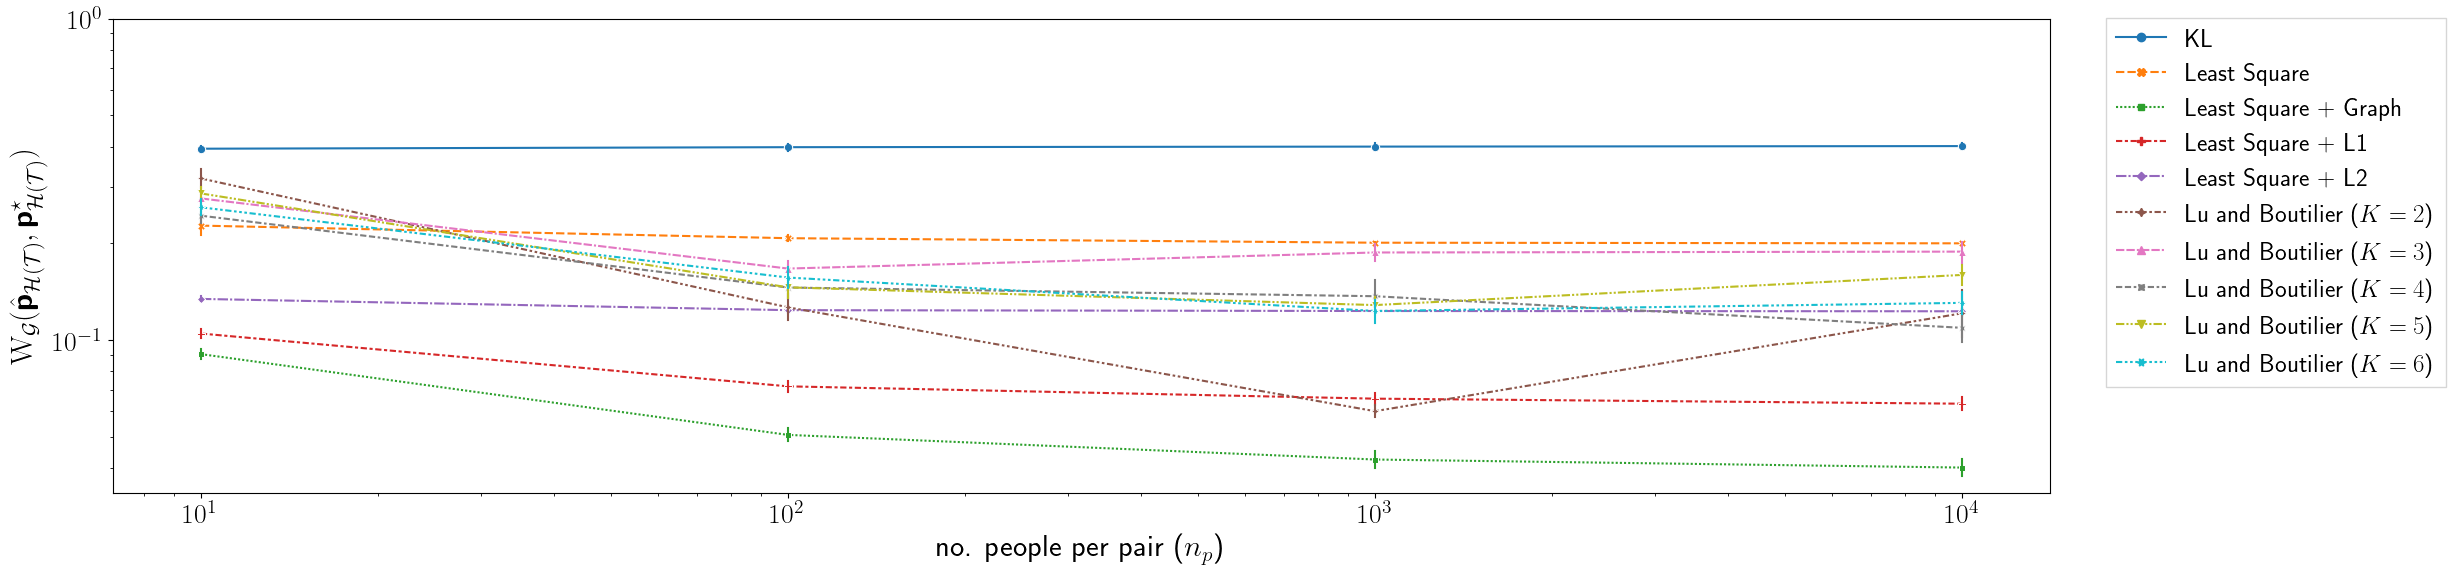

In [8]:
for user_dist in ['uniform', 'gaussian', 'mix2gaussian']:
    df_n_p = pd.read_parquet("varying_n_p_p1.parquet")
    df_n_p = df_n_p[(df_n_p.noise == "noiseless") &
                    (df_n_p.user_dist == "mix3gaussian")]

    df_appendix = pd.read_parquet("2d_varying_n_p_results_appendix.parquet")
    df_appendix = df_appendix[(df_appendix.noise == "noiseless") &
                              (df_appendix.user_dist == user_dist)]
    df_appendix.method = df_appendix.method + df_appendix.K.astype(str)
    

    df_n_p = pd.concat([df_n_p, df_appendix], axis=0)[['n_p', 'wa_err_q_hat', 'method']]
    df_n_p.index = np.arange(len(df_n_p))
    df_n_p.sort_values(by="method", inplace=True)


    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20.7, 5.85))


    sns.lineplot(data=df_n_p,
                 x="n_p",
                 y="wa_err_q_hat",
                 err_style="bars",
                 markers=True,
                 hue="method",
                 style="method",
                 ax=ax)
    ax.set_yscale('log')
    ax.set_ylim([0, 1])
    ax.set_xscale("log")
    ax.set_xticks([10, 100, 1000, 10000])
    ax.set_ylabel(WA, fontsize=label_size)
    ax.set_xlabel(r"no. people per pair ($n_p$)", fontsize=label_size)

    handles, labels = ax.get_legend_handles_labels()
    new_labels = list(map(lambda x: label_mapping[x], labels))
    idx = np.argsort(new_labels)
    handles, labels = np.array(handles)[idx], np.array(new_labels)[idx]

    ax.legend().remove()

    ax.tick_params(axis='both', which='major', labelsize=tick_size)

    fig.legend(handles, labels, loc="upper right", bbox_to_anchor=(1.19, 0.98), fancybox=False, shadow=False, ncol=1, fontsize=legend_size)
    fig.tight_layout()
    fig.savefig(f"fig/2d_aistats_baselines_{user_dist}.pdf", dpi=300, format="pdf", bbox_inches="tight")
    fig.show()